In [12]:
import os #used for system commands
import tempfile #used to create temporary folders to store data
import zipfile #used to extract tar files
import urllib #used to download data via http
from glob import glob #used for manipulating pathnames

from matplotlib import pyplot as plt

import pyart

In [13]:
"""
Options to define our data selection and plotting
"""

#Specific the radar and date we want to download
radar_id     = '50' #this is the Marburg radar near Brisbane. if using a single digit, include a leading 0, e.g., '02'. Complete list of radar id's is on openradar.io
date_str     = '20141127' #in yyyymmdd
base_url     = 'http://dapds00.nci.org.au/thredds/fileServer/rq0' #base url for NCI server

#specify radar tilt and field to plot
tilt      = 2 #third tilt (python starts from 0)!
field     = 'DBZH' #reflectivity

In [14]:
"""
here we build the server request url, download data and unzip
"""

#build request url
tar_fn       = radar_id + '_' + date_str + '.pvol.zip'
request_url  = '/'.join([base_url, 'odim_pvol', radar_id, date_str[0:4], 'vol', tar_fn])
print('my request is ',request_url)
#download the zip file
if not os.path.isfile(tar_fn):
    urllib.request.urlretrieve(request_url, tar_fn)

#extract the zip file to a temporary directory
temp_dir = tempfile.mkdtemp()
zip_fh = zipfile.ZipFile(tar_fn)
zip_fh.extractall(path = temp_dir)
zip_fh.close()

#list all the volumes extracted from the zip file
file_list = sorted(glob(temp_dir + '/*'))
#print out file list
for item in file_list:
    print(file_list.index(item)+1,item)

my request is  http://dapds00.nci.org.au/thredds/fileServer/rq0/odim_pvol/50/2014/vol/50_20141127.pvol.zip
1 /tmp/tmp11xjl6n3/50_20141127_000152.pvol.h5
2 /tmp/tmp11xjl6n3/50_20141127_001152.pvol.h5
3 /tmp/tmp11xjl6n3/50_20141127_002152.pvol.h5
4 /tmp/tmp11xjl6n3/50_20141127_003152.pvol.h5
5 /tmp/tmp11xjl6n3/50_20141127_004152.pvol.h5
6 /tmp/tmp11xjl6n3/50_20141127_005152.pvol.h5
7 /tmp/tmp11xjl6n3/50_20141127_010152.pvol.h5
8 /tmp/tmp11xjl6n3/50_20141127_011152.pvol.h5
9 /tmp/tmp11xjl6n3/50_20141127_012152.pvol.h5
10 /tmp/tmp11xjl6n3/50_20141127_013152.pvol.h5
11 /tmp/tmp11xjl6n3/50_20141127_014152.pvol.h5
12 /tmp/tmp11xjl6n3/50_20141127_015152.pvol.h5
13 /tmp/tmp11xjl6n3/50_20141127_020152.pvol.h5
14 /tmp/tmp11xjl6n3/50_20141127_021152.pvol.h5
15 /tmp/tmp11xjl6n3/50_20141127_022152.pvol.h5
16 /tmp/tmp11xjl6n3/50_20141127_023152.pvol.h5
17 /tmp/tmp11xjl6n3/50_20141127_024152.pvol.h5
18 /tmp/tmp11xjl6n3/50_20141127_025152.pvol.h5
19 /tmp/tmp11xjl6n3/50_20141127_030152.pvol.h5
20 /tmp/t

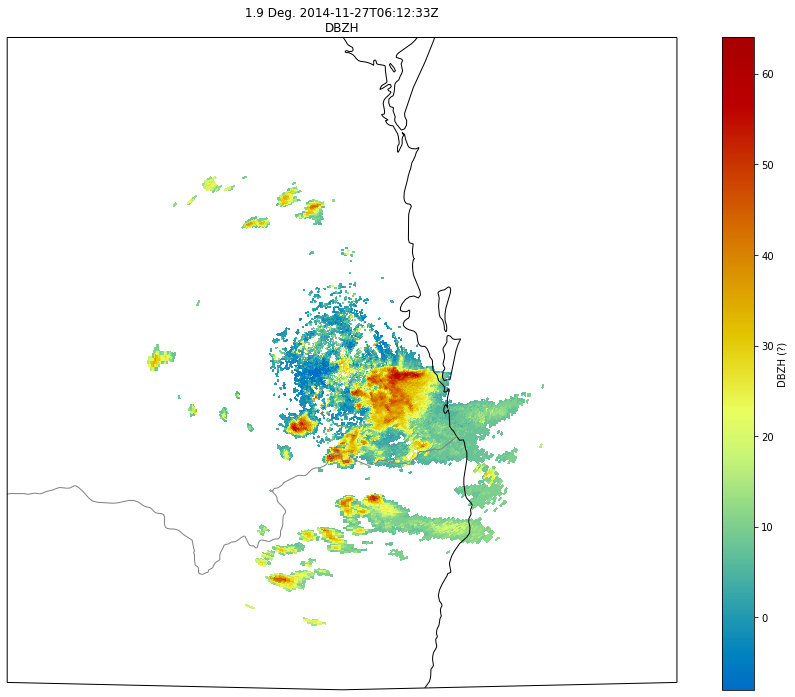

In [10]:
## select a file from the list and plot

#select index from file list
my_index = 37
#read in radar object using pyart
radar = pyart.aux_io.read_odim_h5(file_list[my_index], file_field_names=True)
#generate display object
display = pyart.graph.RadarMapDisplay(radar)
#plot reflectivity field from a single tilt (this function includes a basemap)
fig = plt.figure(figsize=(16, 12), facecolor='w')
display.plot_ppi_map('DBZH', tilt,
                            vmin=-8, vmax=64, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                            resolution='10m')